In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

import scipy.fft

<IPython.core.display.Javascript object>


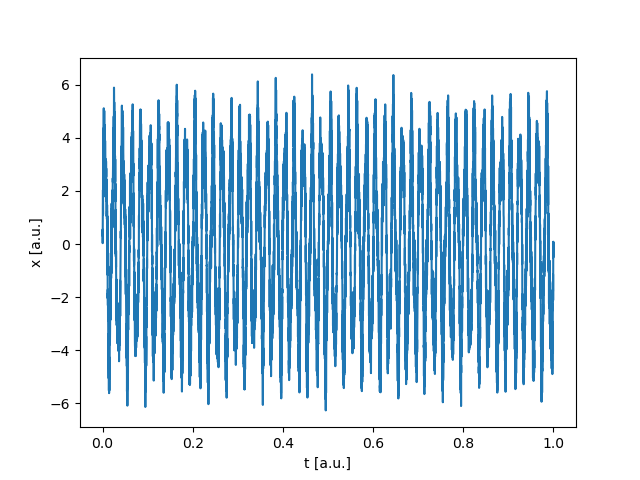

In [3]:
fs = 1.e4

t = np.arange(0., 1.+1./fs, 1/fs)
n_points = t.shape[0]

f1 = 50
f2 = 123
A1 = 2
A2 = 1
A_noise = 0.5

x = A1**2*np.sin(2.*np.pi*f1*t) + A2**2*np.sin(2.*np.pi*f2*t) + A_noise*np.random.randn(n_points)


plt.figure()
plt.plot(t, x)
plt.xlabel('t [a.u.]')
plt.ylabel('x [a.u.]')

plt.savefig('time_domain.pdf')

plt.show()

<IPython.core.display.Javascript object>


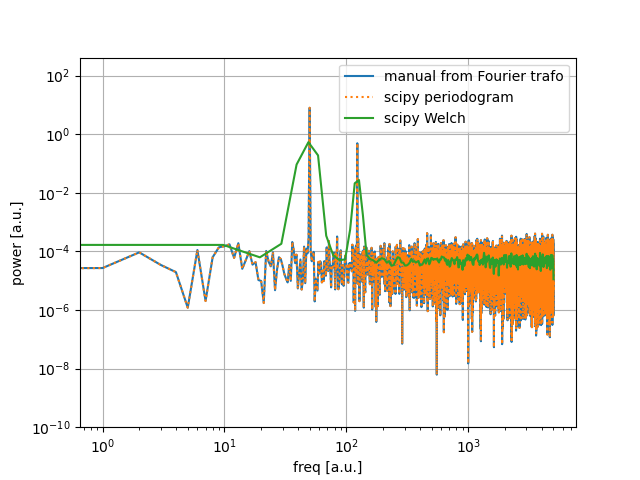

In [4]:
fft = scipy.fft.rfft(x)
freq = np.fft.rfftfreq(n_points, d=1./fs)

power_f = np.abs(fft)**2 / 5.e7

f, Pxx_den = signal.periodogram(x, fs)

f_welch, Pxx_den_welch = signal.welch(x, fs, nperseg=1024)



plt.figure()
plt.plot(freq, power_f, label='manual from Fourier trafo')
plt.plot(f, Pxx_den, ls=':', label='scipy periodogram')
plt.plot(f_welch, Pxx_den_welch, label='scipy Welch')

plt.grid()
plt.semilogx()
plt.semilogy()
plt.ylim(1.e-10, None)
plt.legend()

plt.xlabel('freq [a.u.]')
plt.ylabel('power [a.u.]')

plt.savefig('spectrum.pdf')

plt.show()

In [5]:
np.real(fft).sum()

1655.682986624497

In [6]:
np.abs(1+1j)

1.4142135623730951